In [3]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense  ,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [5]:
data = pd.read_csv('EURUSD')
data.shape

(90000, 9)

In [7]:
#Cretung a new dataframe with only the close , _tickvolume and the open
data = data.filter(['Close'])
# convert the dataframe to numpy array
dataset = data.values
# spliting dataset
train_data_lengh = math.ceil(len(dataset)*.8)
train_data_lengh

72000

In [9]:
#scale the data
scaler = MinMaxScaler(feature_range=(0 ,1 ))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.14616846],
       [0.14553515],
       [0.1490817 ],
       ...,
       [0.26219126],
       [0.26193794],
       [0.26662445]])

In [11]:
train_data = scaled_data[0:train_data_lengh , : ]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i ,0])
  y_train.append(train_data[i,0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.14616846, 0.14553515, 0.1490817 , 0.15237492, 0.15022166,
       0.16098797, 0.15972134, 0.15959468, 0.15794807, 0.15630146,
       0.15896137, 0.15820139, 0.16326789, 0.16263458, 0.16732109,
       0.16618113, 0.15946802, 0.16339455, 0.1659278 , 0.16466118,
       0.16706776, 0.16225459, 0.15984801, 0.15782141, 0.15934136,
       0.15832806, 0.15554148, 0.15402153, 0.15300823, 0.15262825,
       0.15440152, 0.15528816, 0.15592147, 0.15972134, 0.15782141,
       0.15794807, 0.16035465, 0.15870804, 0.15883471, 0.15921469,
       0.15807473, 0.15946802, 0.16098797, 0.16073464, 0.16415453,
       0.16364788, 0.1659278 , 0.16478784, 0.16529449, 0.16466118,
       0.16149462, 0.15706143, 0.15769474, 0.15668144, 0.15338822,
       0.15161495, 0.1521216 , 0.15047498, 0.15161495, 0.14654845])]
[0.14502849905003146]



In [12]:
#convert the x_train ansd the y_train to numpy arrays
x_train , y_train = np.array(x_train) , np.array(y_train)

In [13]:
#reshape the data ,,,,,,,,, convert it to 3d
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1] ,1))
x_train.shape

(71940, 60, 1)

In [14]:
# build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True , input_shape = (x_train.shape[1] , 1)))
model.add(LSTM(50 , return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
#compile the model
model.compile(optimizer='adam' , loss='mse')
# import keras
# model.compile(optimizer=keras.optimizers.Adam(), loss="mse")

In [16]:
# train the model
model.fit(x_train , y_train , batch_size=1 , epochs=1)

71940/71940 [==============================] - 2349s 33ms/step - loss: 8.7255e-05


In [18]:
# create the test dataset
# create a new array containgn scaled values from
test_data = scaled_data[train_data_lengh - 60: , :]
# create the  datasets x_test and y_test
x_test = []
y_test = dataset[train_data_lengh:,:]
for i in range(60 , len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [19]:
# converting it into a numpy aray ,,,,lstm does not accept 2d ,so we conver it to 3d
x_test = np.array(x_test)
# reshaping it
x_test = np.reshape(x_test , (x_test.shape[0], x_test.shape[1] , 1))

In [21]:
# using the model to predict
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

563/563 [==============================] - 11s 19ms/step


In [22]:
# evaluating the model .wuth the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

6.70934882778588e-05

C:\Users\name\AppData\Local\Temp\ipykernel_4656\3164434349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


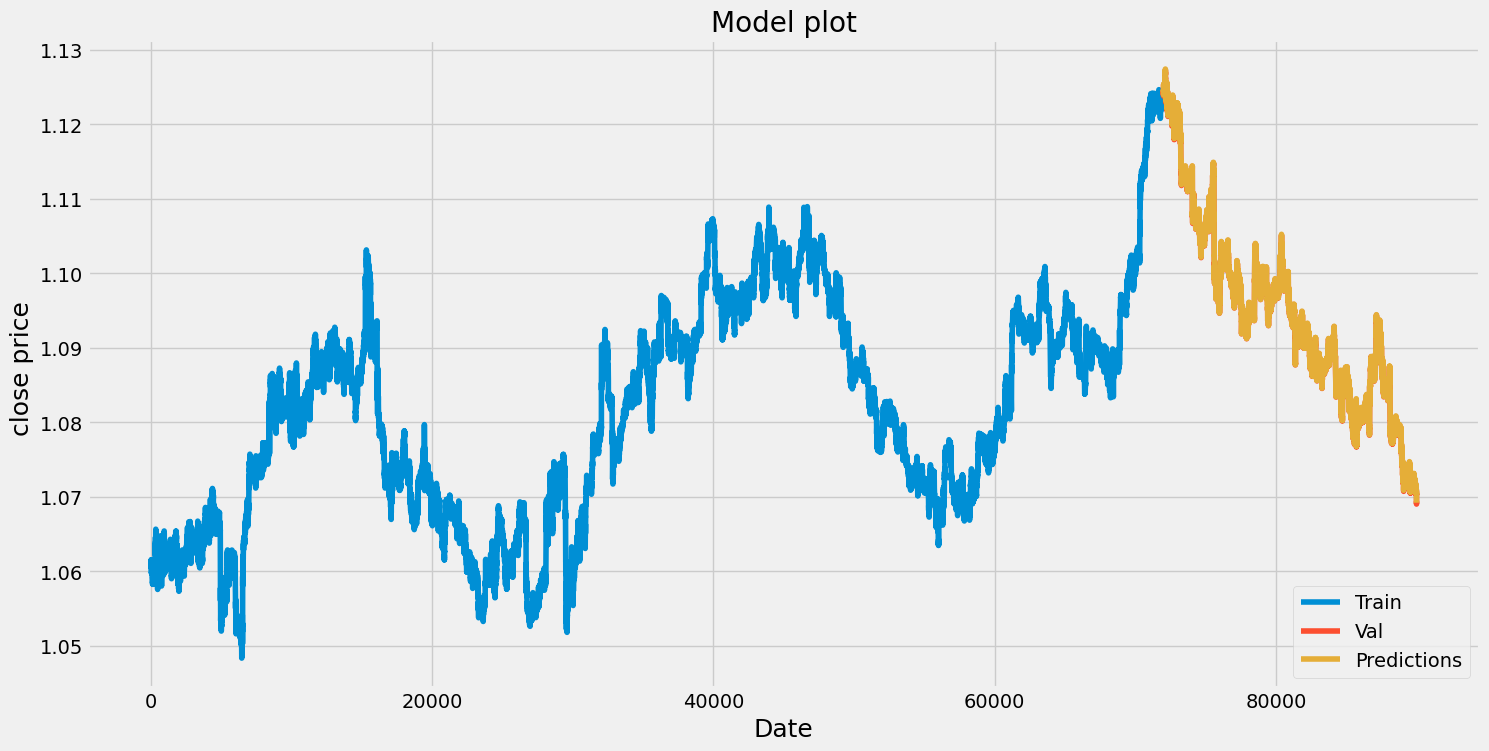

In [25]:
# ploting the data
train = data[:train_data_lengh]
valid = data[train_data_lengh:]
valid['Predictions'] = predictions
# visualize the data
plt.figure(figsize=(16,8))
plt.title('Model plot')
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price ', fontsize= 18)
plt.plot(train['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [24]:
# showing the predicted values
valid

,Close,Predictions
72000,1.12447,1.124395
72001,1.12435,1.124562
72002,1.12453,1.124445
72003,1.12450,1.124644
72004,1.12442,1.124601
...,...,...
89995,1.07038,1.070458
89996,1.06944,1.070536
89997,1.06906,1.069597
89998,1.06904,1.069228


In [27]:
# save model to a relative path
model.save('my_model.h5')



c:\Users\abdelhamid\Desktop\venvs\ml\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# # using it to predict the next price
# # we need to give the model a new data 
# data = # bring the new data
# data = # take only the close
# # cnvert the data frame into an array
# # get the last 60 close prices
# last_60_close_prices = data[-60:].values
# # scale the data to be values between 0 and 1
# last_60_close_prices_scaled = scaler.transform(last_60_close_prices)
# #create an empty list 
# X_test = []
# # append the past 60 close prices
# X_test.append(last_60_close_prices_scaled)
